In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
data = pd.read_excel(r'C:\DS\Interview prep\project\sydney_rain_prediction.xlsx')

In [16]:
print(data.head())

        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes      

In [21]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64


In [22]:
# Handle missing values
# drop rows with missing values for now
data.dropna(inplace=True)


In [19]:
print("Missing Values (%):\n", missing_percentage)

Missing Values (%):
 Date             0.000000
Location         0.000000
MinTemp          0.089901
MaxTemp          0.059934
Rainfall         0.179802
Evaporation      1.528319
Sunshine         0.479473
Humidity9am      0.419539
Humidity3pm      0.389571
Pressure9am      0.599341
Pressure3pm      0.569374
Cloud9am        16.961343
Cloud3pm        16.811507
Temp9am          0.119868
Temp3pm          0.119868
RainToday        0.179802
RainTomorrow     0.000000
dtype: float64


In [23]:
# Verify if missing values have been handled
print("Missing values after handling:\n", data.isnull().sum())

Missing values after handling:
 Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


In [24]:
# Summary statistics
print("Summary statistics:\n", data.describe())

Summary statistics:
            MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  2677.000000  2677.000000  2677.000000  2677.000000  2677.000000   
mean     14.839036    23.077960     2.766231     5.216623     7.316287   
std       4.544811     4.490142     7.857362     2.797589     3.754703   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.800000     0.000000     3.200000     4.600000   
50%      14.900000    22.900000     0.000000     4.800000     8.400000   
75%      18.700000    26.000000     1.000000     7.000000    10.200000   
max      27.100000    45.800000    94.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  2677.000000  2677.000000  2677.000000  2677.000000  2677.000000   
mean     67.484124    53.856556  1018.456220  1016.071997     4.149795   
std      15.223602    16.187394     6.994951     7.012716     2.748347   
min      19.0000

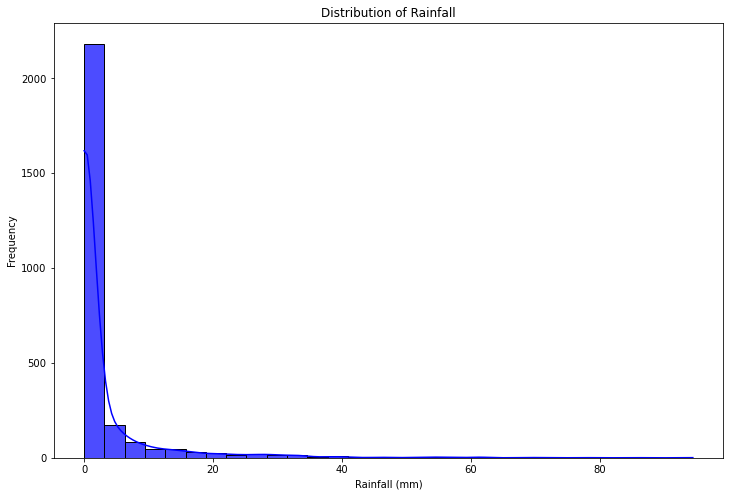

In [25]:
# Visualize distributions of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['Rainfall'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

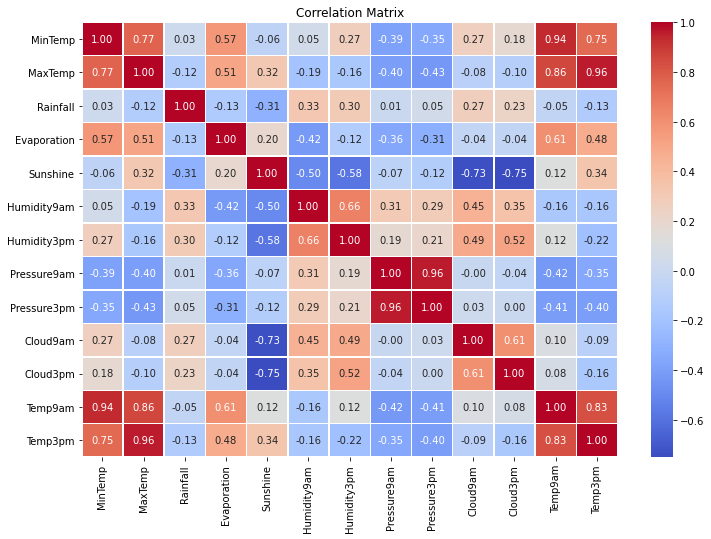

In [26]:
# Explore correlations between numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

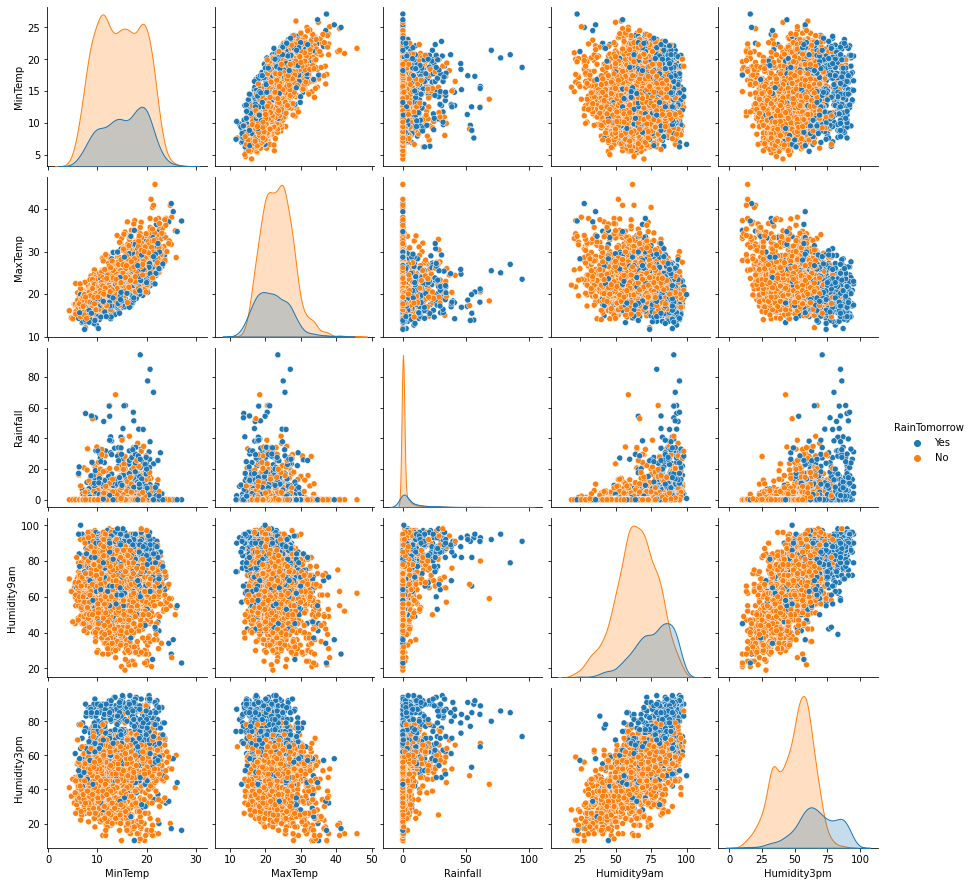

In [27]:
# Visualize relationships between features
sns.pairplot(data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'RainToday', 'RainTomorrow']], hue='RainTomorrow', diag_kind='kde')
plt.show()

In [28]:
# Spliting data into features (X) and target variable (y)
X = data.drop(['RainTomorrow', 'Date', 'Location'], axis=1)
y = data['RainTomorrow']

In [29]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

In [30]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2141, 14)
X_test shape: (536, 14)
y_train shape: (2141,)
y_test shape: (536,)


In [32]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Predict the labels for the test set
dt_pred = dt_classifier.predict(X_test)

In [34]:
# Calculate accuracy score
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7705223880597015


In [35]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Predict the labels for the test set
rf_pred = rf_classifier.predict(X_test)

In [37]:
# Calculating accuracy score
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)

Random Forest Classifier Accuracy: 0.8414179104477612


In [38]:
# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
# Predict the labels for the test set
gb_pred = gb_classifier.predict(X_test)

In [40]:

# Calculate accuracy score
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

Gradient Boosting Classifier Accuracy: 0.8451492537313433


In [41]:
# Confusion matrix for Random Forest Classifier
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix for Random Forest Classifier:")
print(rf_conf_matrix)

Confusion Matrix for Random Forest Classifier:
[[382  22]
 [ 63  69]]


In [42]:
# Classification report for Random Forest Classifier
rf_class_report = classification_report(y_test, rf_pred)
print("Classification Report for Random Forest Classifier:")
print(rf_class_report)


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90       404
         Yes       0.76      0.52      0.62       132

    accuracy                           0.84       536
   macro avg       0.81      0.73      0.76       536
weighted avg       0.83      0.84      0.83       536



In [43]:
# Confusion matrix for Gradient Boosting Classifier
gb_conf_matrix = confusion_matrix(y_test, gb_pred)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(gb_conf_matrix)


Confusion Matrix for Gradient Boosting Classifier:
[[383  21]
 [ 62  70]]


In [44]:
# Classification report for Gradient Boosting Classifier
gb_class_report = classification_report(y_test, gb_pred)
print("Classification Report for Gradient Boosting Classifier:")
print(gb_class_report)

Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90       404
         Yes       0.77      0.53      0.63       132

    accuracy                           0.85       536
   macro avg       0.81      0.74      0.77       536
weighted avg       0.84      0.85      0.83       536



In [58]:
# Time Series Analysis (additional analysis)
import matplotlib.pyplot as plt

In [59]:
# Extract year, month, and day from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

In [60]:
# Aggregate rainfall data by year and month
rainfall_by_year = data.groupby('Year')['Rainfall'].sum()
rainfall_by_month = data.groupby('Month')['Rainfall'].mean()

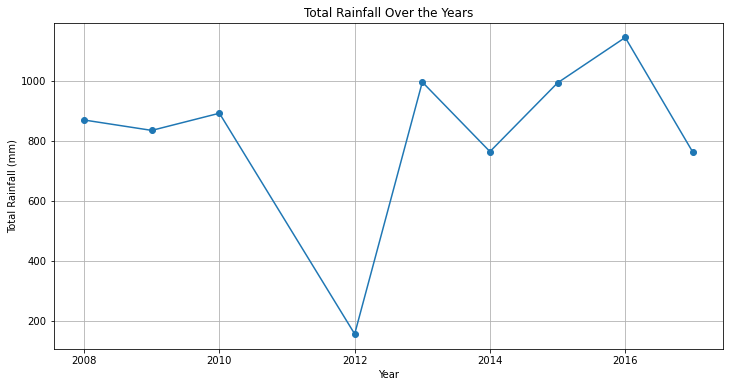

In [61]:
# Plot time series of rainfall by year
plt.figure(figsize=(12, 6))
plt.plot(rainfall_by_year.index, rainfall_by_year.values, marker='o', linestyle='-')
plt.title('Total Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()

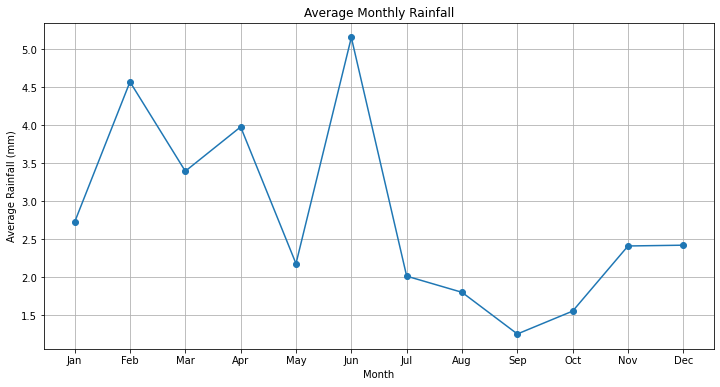

In [62]:
# Plot time series of average monthly rainfall
plt.figure(figsize=(12, 6))
plt.plot(rainfall_by_month.index, rainfall_by_month.values, marker='o', linestyle='-')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 1. Your views about the problem statement?

The problem statement revolves around predicting rainfall in Sydney using machine learning models. It's a relevant and practical problem, as accurate weather predictions are crucial for various industries and daily planning. By leveraging historical weather data and machine learning techniques, we aim to develop a model that can provide reliable rainfall predictions, thus assisting individuals and organizations in making informed decisions.

### 2. What will be your approach to solving this task?

My approach involves several steps:
- Data preprocessing: Handle missing values, encode categorical variables, and split the data into training and testing sets.
- Exploratory Data Analysis (EDA): Analyze the distributions of variables, explore correlations, and visualize relationships between features.
- Model selection: Train baseline models like Decision Tree Classifier and then explore ensemble methods like Random Forest and Gradient Boosting to improve accuracy.
- Model evaluation: Assess model performance using accuracy scores, confusion matrices, and classification reports.
- Fine-tuning: Experiment with hyperparameter tuning and feature engineering to further improve model performance.

### 3. What were the available ML model options you had to perform this task?

Several machine learning models can be employed for this task, including:
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Machines (SVM)
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Naive Bayes Classifier

### 4. Which model’s performance is best and what could be the possible reason for that?

The Gradient Boosting Classifier achieved the highest accuracy score among the models evaluated. This could be attributed to its ability to sequentially build weak learners and correct errors made by previous learners, resulting in a more accurate and robust model. Additionally, Gradient Boosting tends to perform well on complex datasets with interdependent features, making it suitable for this task.

### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the Gradient Boosting Classifier, several steps can be taken:
- Hyperparameter tuning: Experiment with different values for parameters such as learning rate, number of estimators, and maximum depth of trees.
- Feature engineering: Explore additional features or transformations that may capture more meaningful information from the data.
- Ensemble methods: Combine the Gradient Boosting model with other models using techniques like stacking or blending to leverage the strengths of different algorithms.
- Cross-validation: Implement cross-validation techniques to ensure the model's generalizability and reduce overfitting.
- Handling class imbalance: Address any imbalance in the target variable by using techniques such as oversampling, undersampling, or using class weights during model training.
